# Categorization

- Spam filters
- Lots of applications


In [84]:
import sklearn
from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition.pca import PCA
from nltk.sentiment import SentimentIntensityAnalyzer, SentimentAnalyzer

In [85]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
sklearn.feature_extraction.text.TfidfTransformer()

TfidfTransformer()

## Stylometry

The study of style. (~=syntax, ~!=semantics) 
(So, this is not content.) 

Most frequent words (100-1000). 

- Forensic linguistics
- Authorship detection 

In [7]:
gutRaw = [gutenberg.raw(fileid) for fileid in gutenberg.fileids()]

In [31]:
docLabels = [fileid[:-4] for fileid in gutenberg.fileids()]

In [32]:
docLabels

['austen-emma',
 'austen-persuasion',
 'austen-sense',
 'bible-kjv',
 'blake-poems',
 'bryant-stories',
 'burgess-busterbrown',
 'carroll-alice',
 'chesterton-ball',
 'chesterton-brown',
 'chesterton-thursday',
 'edgeworth-parents',
 'melville-moby_dick',
 'milton-paradise',
 'shakespeare-caesar',
 'shakespeare-hamlet',
 'shakespeare-macbeth',
 'whitman-leaves']

In [9]:
[text[:50] for text in gutRaw]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\n',
 '[Persuasion by Jane Austen 1818]\n\n\nChapter 1\n\n\nSir',
 '[Sense and Sensibility by Jane Austen 1811]\n\nCHAPT',
 '[The King James Bible]\n\nThe Old Testament of the K',
 '[Poems by William Blake 1789]\n\n \nSONGS OF INNOCENC',
 '[Stories to Tell to Children by Sara Cone Bryant 1',
 '[The Adventures of Buster Bear by Thornton W. Burg',
 "[Alice's Adventures in Wonderland by Lewis Carroll",
 '[The Ball and The Cross by G.K. Chesterton 1909]\n\n',
 '[The Wisdom of Father Brown by G. K. Chesterton 19',
 '[The Man Who Was Thursday by G. K. Chesterton 1908',
 "[The Parent's Assistant, by Maria Edgeworth]\r\n\r\n\r\n",
 '[Moby Dick by Herman Melville 1851]\r\n\r\n\r\nETYMOLOGY',
 '[Paradise Lost by John Milton 1667] \n \n \nBook I \n ',
 '[The Tragedie of Julius Caesar by William Shakespe',
 '[The Tragedie of Hamlet by William Shakespeare 159',
 '[The Tragedie of Macbeth by William Shakespeare 16',
 '[Leaves of Grass by Walt 

## Tf-IDF

Term frequency adjusted for inverse document frequency


In [36]:
tfidf = TfidfVectorizer(max_features=400)

In [40]:
tfidf.fit_transform(gutRaw)

<18x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6104 stored elements in Compressed Sparse Row format>

In [45]:
docTermMatrixDense = docTermMatrix.todense()

In [46]:
words = tfidf.get_feature_names()

In [50]:
df = pd.DataFrame(docTermMatrixDense, index=docLabels, columns=words)

<AxesSubplot:>

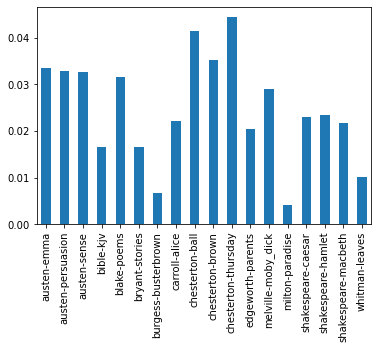

In [52]:
df['an'].plot(kind='bar')

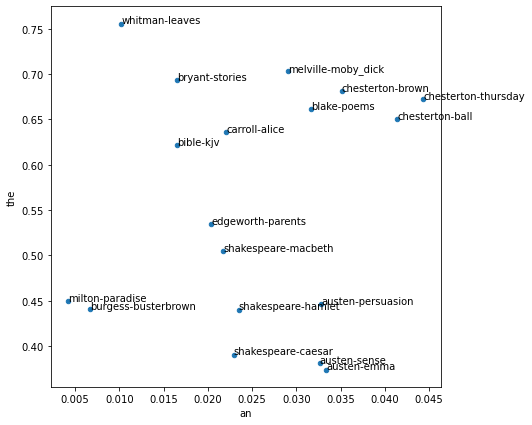

In [64]:
anTheDf = df[['an', 'the']]
ax = anTheDf.plot(kind='scatter', x='an', y='the', figsize=(7,7))
for title, points in anTheDf.iterrows(): 
    ax.annotate(title, points)

## PCA: Principal Component Analysis

Reduces the dimensions of a matrix

In [68]:
pca = PCA(n_components=2)

In [70]:
pcaOut = pca.fit_transform(docTermMatrixDense)

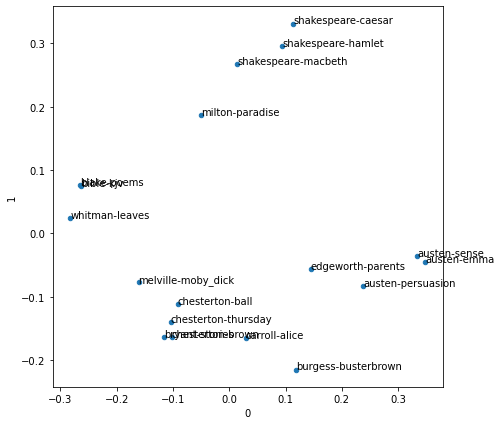

In [76]:
pcaOutDf = pd.DataFrame(pcaOut, index=docLabels)
ax = pcaOutDf.plot(kind='scatter', x=0, y=1, figsize=(7,7))
for title, points in pcaOutDf.iterrows(): 
    ax.annotate(title, points)

## Sentiment Analysis

Sent. Polarity (binary, floating point)
Or other affects (anger, sadness, anxiety) 

"Wow this a wonderful movie!"
 - wonderful: 0.9 
 - wow: 0.0 
 - terrible: -0.9 
    
SentiWordNet: list of words and their sentiment scores

Negation propagation: 

 - "I really really think this movie is not wonderful." 


In [86]:
sentimentAnalyzer = SentimentIntensityAnalyzer()

In [87]:
sentimentAnalyzer.polarity_scores("I really really think this movie is not wonderful.")

{'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound': -0.4585}

In [88]:
sentimentAnalyzer.polarity_scores('Wow this a wonderful movie!')

{'neg': 0.0, 'neu': 0.204, 'pos': 0.796, 'compound': 0.8313}

In [92]:
[sentimentAnalyzer.polarity_scores(text[:50000]) for text in gutRaw]

[{'neg': 0.082, 'neu': 0.708, 'pos': 0.21, 'compound': 1.0},
 {'neg': 0.078, 'neu': 0.759, 'pos': 0.163, 'compound': 1.0},
 {'neg': 0.071, 'neu': 0.75, 'pos': 0.179, 'compound': 1.0},
 {'neg': 0.031, 'neu': 0.891, 'pos': 0.079, 'compound': 0.9999},
 {'neg': 0.135, 'neu': 0.654, 'pos': 0.211, 'compound': 1.0},
 {'neg': 0.06, 'neu': 0.84, 'pos': 0.1, 'compound': 0.9999},
 {'neg': 0.062, 'neu': 0.795, 'pos': 0.143, 'compound': 1.0},
 {'neg': 0.086, 'neu': 0.812, 'pos': 0.102, 'compound': 0.9995},
 {'neg': 0.116, 'neu': 0.76, 'pos': 0.125, 'compound': 0.9987},
 {'neg': 0.084, 'neu': 0.794, 'pos': 0.122, 'compound': 0.9999},
 {'neg': 0.098, 'neu': 0.77, 'pos': 0.132, 'compound': 0.9999},
 {'neg': 0.07, 'neu': 0.8, 'pos': 0.131, 'compound': 1.0},
 {'neg': 0.079, 'neu': 0.824, 'pos': 0.097, 'compound': 0.9995},
 {'neg': 0.174, 'neu': 0.668, 'pos': 0.158, 'compound': -0.9996},
 {'neg': 0.072, 'neu': 0.816, 'pos': 0.111, 'compound': 0.9999},
 {'neg': 0.067, 'neu': 0.814, 'pos': 0.119, 'compound